### The dataset has mushrooms described in terms of physical characteristics in 22 attributes. The purpose of this ML model is to classify them as poisonous or edible

In [151]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [152]:
# Source: https://archive.ics.uci.edu/ml/datasets/Mushroom
df= pd.read_csv('mushroom.data.csv',names=['class','cap_shape','cap_surface','cap_color','bruises?','odor','gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape','stalk_root','stk_sur_abv_ring','stk_sur_blw_ring','stk_clr_abv_ring','stk_clr_blw_ring','veil_type','veil_color','ring_number','ring_type','spore_print_color','population','habitat'])

In [153]:
def printall(df, max_rows=5):
    from IPython.display import display, HTML
    display(HTML(df.to_html(max_rows=max_rows)))
    
printall(df)

,class,cap_shape,cap_surface,cap_color,bruises?,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stk_sur_abv_ring,stk_sur_blw_ring,stk_clr_abv_ring,stk_clr_blw_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,o,c,l


###  Attribute info
     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d


### Editing attribute values with the key provided

In [154]:
#1.cap_shape
df.cap_shape.value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
dtype: int64

In [155]:
df.cap_shape= df.cap_shape.str.replace('x','1').str.replace('f','2').str.replace('k','3').str.replace('b','4').str.replace('s','5').str.replace('c','6')

In [156]:
df.cap_shape= df.cap_shape.str.replace('1','convex').str.replace('2','flat').str.replace('3','knobbed').str.replace('4','bell').str.replace('5','sunken').str.replace('6','conical')

In [157]:
df.cap_shape.value_counts()

convex     3656
flat       3152
knobbed     828
bell        452
sunken       32
conical       4
dtype: int64

In [158]:
#2.cap_surface
df.cap_surface.value_counts()

y    3244
s    2556
f    2320
g       4
dtype: int64

In [159]:
df.cap_surface= df.cap_surface.str.replace('y','1').str.replace('s','2').str.replace('f','3').str.replace('g','4')

In [160]:
df.cap_surface= df.cap_surface.str.replace('1','scaly').str.replace('2','smooth').str.replace('3','fibrous').str.replace('4','grooves')

In [161]:
df.cap_surface.value_counts()

scaly      3244
smooth     2556
fibrous    2320
grooves       4
dtype: int64

In [162]:
#3.cap_color
df.cap_color.value_counts()

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
dtype: int64

In [163]:
df.cap_color= df.cap_color.str.replace('n','1').str.replace('g','2').str.replace('e','3').str.replace('y','4').str.replace('w','5').str.replace('b','6').str.replace('p','7').str.replace('c','8').str.replace('u','9').str.replace('r','>')

In [164]:
df.cap_color= df.cap_color.str.replace('1','brown').str.replace('2','gray').str.replace('3','red').str.replace('4','yellow').str.replace('5','white').str.replace('6','buff').str.replace('7','pink').str.replace('8','cinnamon').str.replace('9','purple').str.replace('>','green')

In [165]:
df.cap_color.value_counts()

brown       2284
gray        1840
red         1500
yellow      1072
white       1040
buff         168
pink         144
cinnamon      44
purple        16
green         16
dtype: int64

In [166]:
#4.bruises?
df['bruises?'].value_counts()

f    4748
t    3376
dtype: int64

In [167]:
df['bruises?']= df['bruises?'].str.replace('t','yes').str.replace('f','no')

In [168]:
df['bruises?'].value_counts()

no     4748
yes    3376
dtype: int64

In [169]:
#5.odor
df.odor.value_counts()

n    3528
f    2160
y     576
s     576
l     400
a     400
p     256
c     192
m      36
dtype: int64

In [170]:
df.odor= df.odor.str.replace('n','1').str.replace('f','2').str.replace('y','3').str.replace('s','4').str.replace('l','5').str.replace('a','6').str.replace('p','7').str.replace('c','8').str.replace('m','9')

In [171]:
df.odor= df.odor.str.replace('1','none').str.replace('2','foul').str.replace('3','fishy').str.replace('4','spicy').str.replace('5','anese').str.replace('6','almond').str.replace('7','pungent').str.replace('8','creosote').str.replace('9','musty')

In [172]:
df.odor.value_counts()

none        3528
foul        2160
fishy        576
spicy        576
anese        400
almond       400
pungent      256
creosote     192
musty         36
dtype: int64

In [173]:
#6.gill_attachment
df.gill_attachment.value_counts()

f    7914
a     210
dtype: int64

In [174]:
df.gill_attachment= df.gill_attachment.str.replace('f','free').str.replace('a','attached')

In [175]:
df.gill_attachment.value_counts()

free        7914
attached     210
dtype: int64

In [176]:
#7.gill_spacing
df.gill_spacing.value_counts()

c    6812
w    1312
dtype: int64

In [177]:
df.gill_spacing= df.gill_spacing.str.replace('c','close').str.replace('w','crowded')

In [178]:
df.gill_spacing.value_counts()

close      6812
crowded    1312
dtype: int64

In [179]:
#8.gill_size
df.gill_size.value_counts()

b    5612
n    2512
dtype: int64

In [180]:
df.gill_size= df.gill_size.str.replace('b','broad').str.replace('n','narrow')

In [181]:
df.gill_size.value_counts()

broad     5612
narrow    2512
dtype: int64

In [182]:
#9.grill_color
df.gill_color.value_counts()

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
dtype: int64

In [183]:
df.gill_color= df.gill_color.str.replace('b','1').str.replace('p','2').str.replace('w','3').str.replace('n','4').str.replace('g','5').str.replace('h','6').str.replace('u','7').str.replace('k','8').str.replace('e','9').str.replace('y','>').str.replace('o','/').str.replace('r','=')

In [184]:
df.gill_color= df.gill_color.str.replace('1','buff').str.replace('2','pink').str.replace('3','white').str.replace('4','brown').str.replace('5','gray').str.replace('6','chocolate').str.replace('7','purple').str.replace('8','black').str.replace('9','red').str.replace('>','yellow').str.replace('/','orange').str.replace('=','green')

In [185]:
df.gill_color.value_counts()

buff         1728
pink         1492
white        1202
brown        1048
gray          752
chocolate     732
purple        492
black         408
red            96
yellow         86
orange         64
green          24
dtype: int64

In [186]:
#10.stalk_shape
df.stalk_shape.value_counts()

t    4608
e    3516
dtype: int64

In [187]:
df.stalk_shape= df.stalk_shape.str.replace('t','1').str.replace('e','2')

In [188]:
df.stalk_shape= df.stalk_shape.str.replace('1','tapering').str.replace('2','enlarging')

In [189]:
df.stalk_shape.value_counts()

tapering     4608
enlarging    3516
dtype: int64

In [190]:
#11.stalk_root
df.stalk_root.value_counts()

b    3776
?    2480
e    1120
c     556
r     192
dtype: int64

In [191]:
df.stalk_root= df.stalk_root.str.replace('b','1').str.replace('?','2').str.replace('e','3').str.replace('c','4').str.replace('r','5')

In [192]:
df.stalk_root= df.stalk_root.str.replace('1','bulbous').str.replace('2','missing').str.replace('3','equal').str.replace('4','club').str.replace('5','rooted')

In [193]:
df.stalk_root.value_counts()

bulbous    3776
missing    2480
equal      1120
club        556
rooted      192
dtype: int64

In [194]:
#12.stk_sur_abv_ring
df.stk_sur_abv_ring.value_counts()

s    5176
k    2372
f     552
y      24
dtype: int64

In [195]:
df.stk_sur_abv_ring= df.stk_sur_abv_ring.str.replace('s','1').str.replace('k','2').str.replace('f','3').str.replace('y','4')

In [196]:
df.stk_sur_abv_ring= df.stk_sur_abv_ring.str.replace('1','smooth').str.replace('2','silky').str.replace('3','fibrous').str.replace('4','scaly')

In [197]:
df.stk_sur_abv_ring.value_counts()

smooth     5176
silky      2372
fibrous     552
scaly        24
dtype: int64

In [198]:
#13.stk_sur_blw_ring
df.stk_sur_blw_ring.value_counts()

s    4936
k    2304
f     600
y     284
dtype: int64

In [199]:
df.stk_sur_blw_ring= df.stk_sur_blw_ring.str.replace('s','1').str.replace('k','2').str.replace('f','3').str.replace('y','4')

In [200]:
df.stk_sur_blw_ring= df.stk_sur_blw_ring.str.replace('1','smooth').str.replace('2','silky').str.replace('3','fibrous').str.replace('4','scaly')

In [201]:
df.stk_sur_blw_ring.value_counts()

smooth     4936
silky      2304
fibrous     600
scaly       284
dtype: int64

In [202]:
#14.stk_clr_abv_ring
df.stk_clr_abv_ring.value_counts()

w    4464
p    1872
g     576
n     448
b     432
o     192
e      96
c      36
y       8
dtype: int64

In [203]:
df.stk_clr_abv_ring=df.stk_clr_abv_ring.str.replace('w','1').str.replace('p','2').str.replace('g','3').str.replace('n','4').str.replace('b','5').str.replace('o','6').str.replace('e','7').str.replace('c','8').str.replace('y','9')

In [204]:
df.stk_clr_abv_ring=df.stk_clr_abv_ring.str.replace('1','white').str.replace('2','pink').str.replace('3','gray').str.replace('4','borwn').str.replace('5','buff').str.replace('6','orange').str.replace('7','red').str.replace('8','cinnamon').str.replace('9','yellow')

In [205]:
df.stk_clr_abv_ring.value_counts()

white       4464
pink        1872
gray         576
borwn        448
buff         432
orange       192
red           96
cinnamon      36
yellow         8
dtype: int64

In [206]:
#15.stk_clr_blw_ring
df.stk_clr_blw_ring.value_counts()

w    4384
p    1872
g     576
n     512
b     432
o     192
e      96
c      36
y      24
dtype: int64

In [207]:
df.stk_clr_blw_ring= df.stk_clr_blw_ring.str.replace('w','1').str.replace('p','2').str.replace('g','3').str.replace('n','4').str.replace('b','5').str.replace('o','6').str.replace('e','7').str.replace('c','8').str.replace('y','9')

In [208]:
df.stk_clr_blw_ring= df.stk_clr_blw_ring.str.replace('1','white').str.replace('2','pink').str.replace('3','gray').str.replace('4','borwn').str.replace('5','buff').str.replace('6','orange').str.replace('7','red').str.replace('8','cinnamon').str.replace('9','yellow')

In [209]:
df.stk_clr_blw_ring.value_counts()

white       4384
pink        1872
gray         576
borwn        512
buff         432
orange       192
red           96
cinnamon      36
yellow        24
dtype: int64

In [210]:
#16.veil_type
df.veil_type.value_counts()


p    8124
dtype: int64

In [211]:
df.veil_type= df.veil_type.str.replace('p','partial')

In [212]:
#17.veil_color
df.veil_color.value_counts()

w    7924
o      96
n      96
y       8
dtype: int64

In [213]:
df.veil_color= df.veil_color.str.replace('w','1').str.replace('o','2').str.replace('n','3').str.replace('y','4')

In [214]:
df.veil_color=df.veil_color.str.replace('1','white').str.replace('2','orange').str.replace('3','brown').str.replace('4','yellow')

In [215]:
df.veil_color.value_counts()

white     7924
orange      96
brown       96
yellow       8
dtype: int64

In [216]:
#18.ring_number
df.ring_number.value_counts()

o    7488
t     600
n      36
dtype: int64

In [217]:
df.ring_number= df.ring_number.str.replace('o','1').str.replace('t','2').str.replace('n','3')

In [218]:
df.ring_number= df.ring_number.str.replace('1','one').str.replace('2','two').str.replace('3','none')

In [219]:
df.ring_number.value_counts()

one     7488
two      600
none      36
dtype: int64

In [220]:
#19.ring_type
df.ring_type.value_counts()

p    3968
e    2776
l    1296
f      48
n      36
dtype: int64

In [221]:
df.ring_type= df.ring_type.str.replace('p','1').str.replace('e','2').str.replace('l','3').str.replace('f','4').str.replace('n','5')

In [222]:
df.ring_type= df.ring_type.str.replace('1','pendant').str.replace('2','evanescent').str.replace('3','large').str.replace('4','flaring').str.replace('5','none')

In [223]:
df.ring_type.value_counts()

pendant       3968
evanescent    2776
large         1296
flaring         48
none            36
dtype: int64

In [224]:
#20.spore_print_color
df.spore_print_color.value_counts()

w    2388
n    1968
k    1872
h    1632
r      72
u      48
b      48
o      48
y      48
dtype: int64

In [225]:
df.spore_print_color= df.spore_print_color.str.replace('w','1').str.replace('n','2').str.replace('k','3').str.replace('h','4').str.replace('r','5').str.replace('u','6').str.replace('b','7').str.replace('o','8').str.replace('y','9')

In [226]:
df.spore_print_color= df.spore_print_color.str.replace('1','white').str.replace('2','brown').str.replace('3','black').str.replace('4','chocolate').str.replace('5','green').str.replace('6','purple').str.replace('7','buff').str.replace('8','orange').str.replace('9','yellow')

In [227]:
df.spore_print_color.value_counts()

white        2388
brown        1968
black        1872
chocolate    1632
green          72
buff           48
purple         48
orange         48
yellow         48
dtype: int64

In [228]:
#21.population
df.population.value_counts()

v    4040
y    1712
s    1248
n     400
a     384
c     340
dtype: int64

In [229]:
df.population= df.population.str.replace('v','1').str.replace('y','2').str.replace('s','3').str.replace('n','4').str.replace('a','5').str.replace('c','6')

In [230]:
df.population= df.population.str.replace('1','several').str.replace('2','solitary').str.replace('3','scattered').str.replace('4','numerous').str.replace('5','abundant').str.replace('6','clustered')

In [231]:
df.population.value_counts()

several      4040
solitary     1712
scattered    1248
numerous      400
abundant      384
clustered     340
dtype: int64

In [232]:
#22.habitat
df.habitat.value_counts()

d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
dtype: int64

In [233]:
df.habitat= df.habitat.str.replace('d','1').str.replace('g','2').str.replace('p','3').str.replace('l','4').str.replace('u','5').str.replace('m','6').str.replace('w','7')

In [234]:
df.habitat= df.habitat.str.replace('1','woods').str.replace('2','grasses').str.replace('3','paths').str.replace('4','leaves').str.replace('5','urban').str.replace('6','meadows').str.replace('7','waste')

In [235]:
df.habitat.value_counts()

woods      3148
grasses    2148
paths      1144
leaves      832
urban       368
meadows     292
waste       192
dtype: int64

In [236]:
printall(df)

,class,cap_shape,cap_surface,cap_color,bruises?,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stk_sur_abv_ring,stk_sur_blw_ring,stk_clr_abv_ring,stk_clr_blw_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,convex,smooth,brown,yes,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,e,convex,smooth,yellow,yes,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8122,p,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,tapering,missing,smooth,silky,white,white,partial,white,one,evanescent,white,several,leaves
8123,e,convex,smooth,brown,no,none,attached,close,broad,yellow,enlarging,missing,smooth,smooth,orange,orange,partial,orange,one,pendant,orange,clustered,leaves


<hr>

### EDA

In [237]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

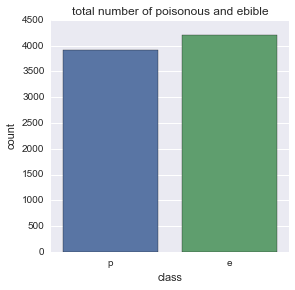

In [238]:

sns.factorplot('class', data=df, kind='count', aspect=1.2)
plt.title('total number of poisonous and ebible')

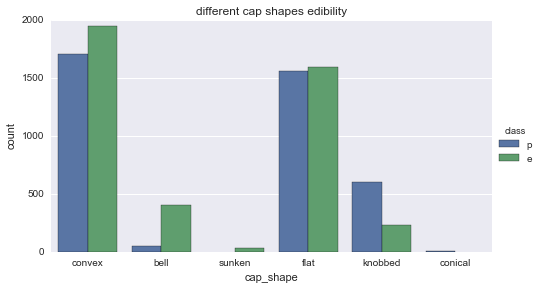

In [239]:
sns.factorplot('cap_shape', data=df, kind='count',hue='class', aspect=1.7)
plt.title('different cap shapes edibility') 
# we cant really tell if the mushroom is edible based on the cap shape

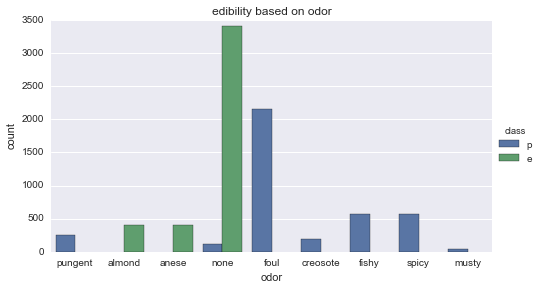

In [240]:
sns.factorplot('odor', data=df, kind='count',hue='class', aspect=1.7)
plt.title('edibility based on odor') 
#if the mushroom smells pungent,foul,creosote,fishy,spicy or musty dont eat it!

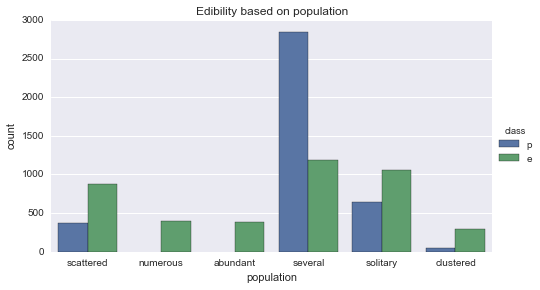

In [241]:
sns.factorplot('population', data=df, kind='count',hue='class', aspect=1.7)
plt.title('Edibility based on population')
# if the mushrooms are in a very large quantity then they are edible

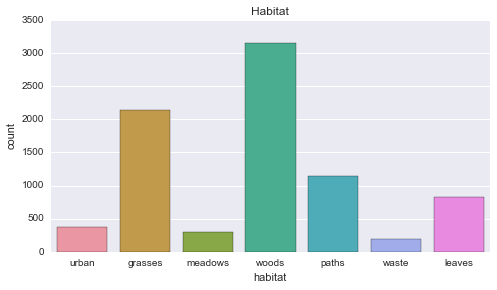

In [242]:
sns.factorplot('habitat', data=df, kind='count', aspect=1.7)
plt.title('Habitat')
# most of the mushrooms are grow in woods.They are found least in urban areas,meadows and waste.

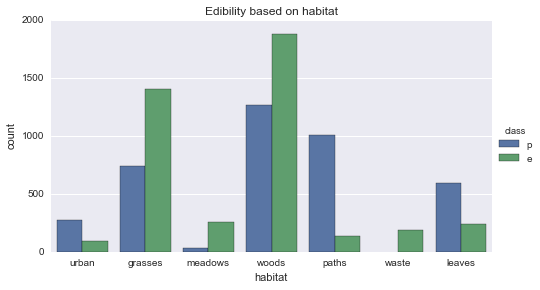

In [243]:
sns.factorplot('habitat', data=df, kind='count',hue='class', aspect=1.7)
plt.title('Edibility based on habitat')
# mushrooms found in waste and meadows are mostly edible. paths, urban areas and leaves have less edible mushrooms.

<hr>

### Creating columns for each category of the attributes

In [244]:
a= pd.get_dummies(df.cap_shape,prefix= 'cap_shape')
b= pd.get_dummies(df.cap_surface,prefix='cap_surface')
c= pd.get_dummies(df.cap_color,prefix='cap_color')
d= pd.get_dummies(df['bruises?'], prefix='bruises?')
e= pd.get_dummies(df.odor, prefix='odor')
f= pd.get_dummies(df.gill_attachment, prefix='gill_attachment')
g= pd.get_dummies(df.gill_spacing, prefix='gill_spacing')
h= pd.get_dummies(df.gill_size, prefix='gill_size')
i= pd.get_dummies(df.gill_color,prefix='gill_color')
j= pd.get_dummies(df.stalk_shape,prefix='stalk_shape')
k= pd.get_dummies(df.stalk_root, prefix='stalk_root')
l= pd.get_dummies(df.stk_sur_abv_ring, prefix='stk_sur_abv_ring')
m= pd.get_dummies(df.stk_sur_blw_ring, prefix='stk_sur_blw_ring')
n= pd.get_dummies(df.stk_clr_abv_ring, prefix='stk_clr_abv_ring')
o= pd.get_dummies(df.stk_clr_blw_ring, prefix='stk_clr_blw_ring')
p= pd.get_dummies(df.veil_type, prefix='veil_type')
q= pd.get_dummies(df.veil_color, prefix='veil_color')
r= pd.get_dummies(df.ring_number, prefix='ring_number')
s= pd.get_dummies(df.ring_type, prefix='ring_type')
t= pd.get_dummies(df.spore_print_color, prefix='spore_print_color')
u= pd.get_dummies(df['population'],prefix='population')
v= pd.get_dummies(df.habitat, prefix='habitat')


In [245]:
data= pd.concat((a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v),axis=1)

In [246]:
printall(data)

,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_knobbed,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,cap_color_brown,cap_color_buff,cap_color_cinnamon,cap_color_gray,cap_color_green,cap_color_pink,cap_color_purple,cap_color_red,cap_color_white,cap_color_yellow,bruises?_no,bruises?_yes,odor_almond,odor_anese,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_none,odor_pungent,odor_spicy,gill_attachment_attached,gill_attachment_free,gill_spacing_close,gill_spacing_crowded,gill_size_broad,gill_size_narrow,gill_color_black,gill_color_brown,gill_color_buff,gill_color_chocolate,gill_color_gray,gill_color_green,gill_color_orange,gill_color_pink,gill_color_purple,gill_color_red,gill_color_white,gill_color_yellow,stalk_shape_enlarging,stalk_shape_tapering,stalk_root_bulbous,stalk_root_club,stalk_root_equal,stalk_root_missing,stalk_root_rooted,stk_sur_abv_ring_fibrous,stk_sur_abv_ring_scaly,stk_sur_abv_ring_silky,stk_sur_abv_ring_smooth,stk_sur_blw_ring_fibrous,stk_sur_blw_ring_scaly,stk_sur_blw_ring_silky,stk_sur_blw_ring_smooth,stk_clr_abv_ring_borwn,stk_clr_abv_ring_buff,stk_clr_abv_ring_cinnamon,stk_clr_abv_ring_gray,stk_clr_abv_ring_orange,stk_clr_abv_ring_pink,stk_clr_abv_ring_red,stk_clr_abv_ring_white,stk_clr_abv_ring_yellow,stk_clr_blw_ring_borwn,stk_clr_blw_ring_buff,stk_clr_blw_ring_cinnamon,stk_clr_blw_ring_gray,stk_clr_blw_ring_orange,stk_clr_blw_ring_pink,stk_clr_blw_ring_red,stk_clr_blw_ring_white,stk_clr_blw_ring_yellow,veil_type_partial,veil_color_brown,veil_color_orange,veil_color_white,veil_color_yellow,ring_number_none,ring_number_one,ring_number_two,ring_type_evanescent,ring_type_flaring,ring_type_large,ring_type_none,ring_type_pendant,spore_print_color_black,spore_print_color_brown,spore_print_color_buff,spore_print_color_chocolate,spore_print_color_green,spore_print_color_orange,spore_print_color_purple,spore_print_color_white,spore_print_color_yellow,population_abundant,population_clustered,population_numerous,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8122,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
8123,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [247]:
df['class']= df['class'].str.replace('e','1').str.replace('p','0')

In [248]:
y= df['class']

In [249]:
y= y.astype('float64')

### Buliding a RandomForestClassifier model

In [250]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [251]:
### Grid Search
n_estimators = [300,500,700]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [2,3,5]


rfc = RandomForestClassifier(n_jobs=1)
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=1)
                              

In [252]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=.2, random_state=42)

In [253]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'min_samples_split': [2, 3, 5], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [300, 500, 700]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [254]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [255]:
model = estimator.best_estimator_

<hr>

### Validation

#### Accuracy score

In [256]:
accuracy = accuracy_score(y_test, model.predict(X_test))
print "Accuracy: ", accuracy

Accuracy:  1.0


#### Precision and recall

In [257]:
print classification_report(y_test, model.predict(X_test))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       782
        1.0       1.00      1.00      1.00       843

avg / total       1.00      1.00      1.00      1625



#### AUC score

In [258]:
roc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print "AUC Score: ", roc

AUC Score:  1.0


#### K-Fold CV

In [259]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(model, data, y, cv=10)

In [260]:
scores

array([ 0.68511685,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  0.99876695,  1.        ])

In [261]:
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/-  %f" % (mean_score, ci)
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)

Score is 0.968388 +/-  0.067543
95 percent probability that if this experiment were repeated over and over the average score would be between 0.900846 and 1.035931


<hr>

### Feature importance of RFmodel's dataset

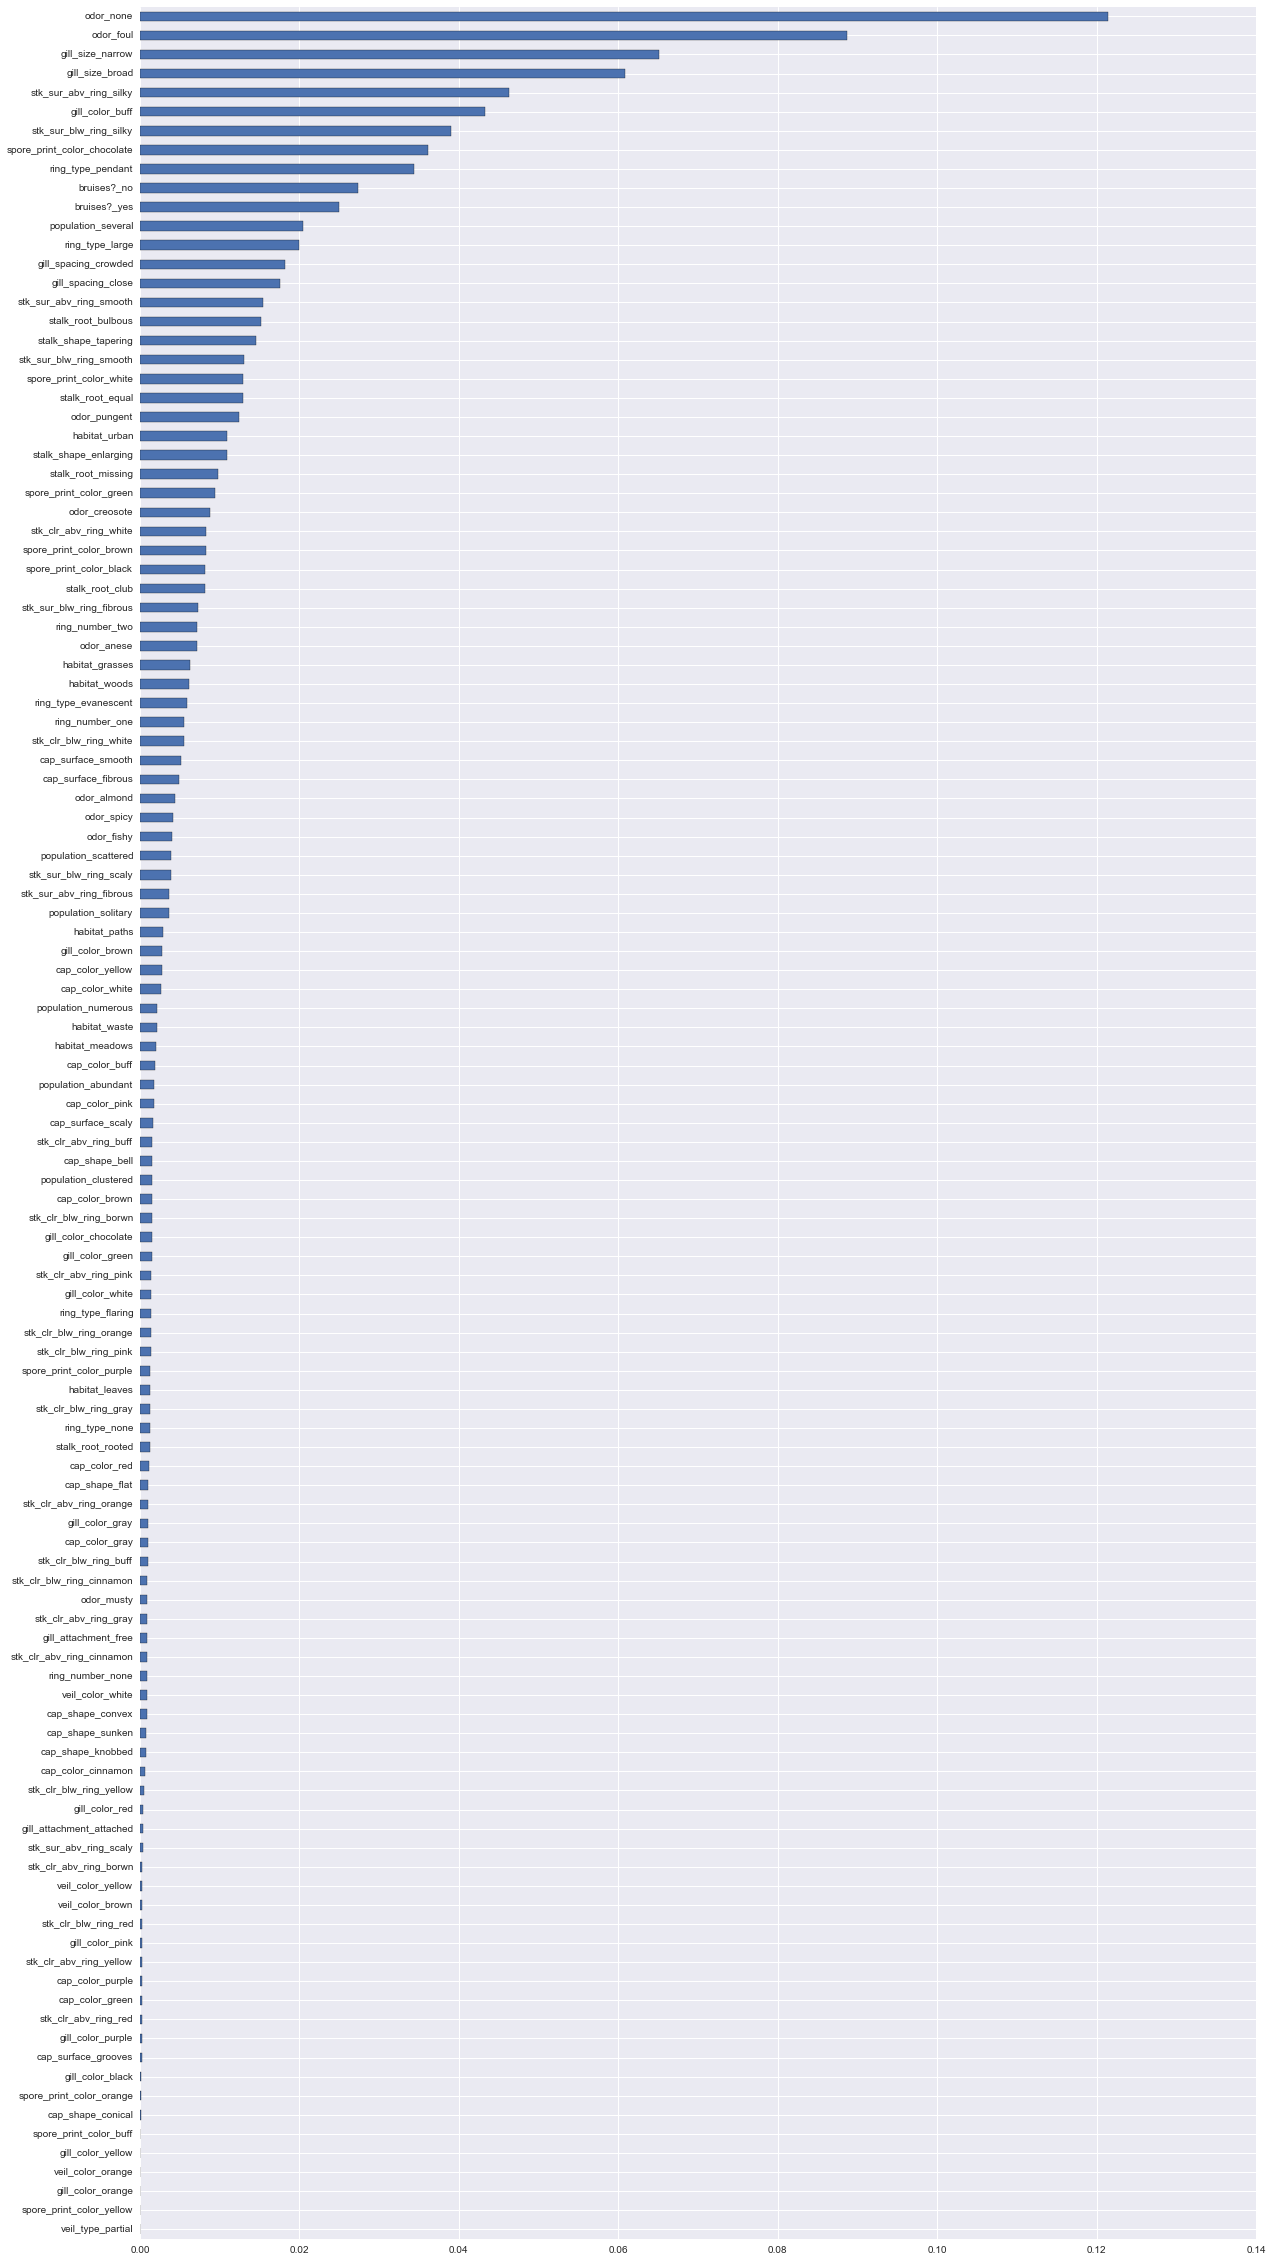

In [262]:
%matplotlib inline
feature_importances = pd.Series(model.feature_importances_, index=data.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(20,40));

### Feature importance of original dataset

In [263]:
categorical_variables= ['cap_shape','cap_surface','cap_color','bruises?','odor','gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape','stalk_root','stk_sur_abv_ring','stk_sur_blw_ring','stk_clr_abv_ring','stk_clr_blw_ring','veil_type','veil_color','ring_number','ring_type','spore_print_color','population','habitat']

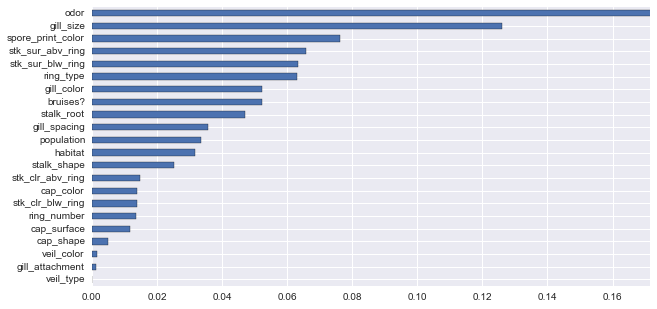

In [264]:
def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, 
                              summarized_columns=None):

    if autoscale:
        x_scale = model.feature_importances_.max()+ headroom
    else:
        x_scale = 1
    
    feature_dict=dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns: 
        #some dummy columns need to be summarized
        for col_name in summarized_columns: 
            #sum all the features that contain col_name, store in temp sum_value
            sum_value = sum(x for i, x in feature_dict.iteritems() if col_name in i )  
            
            #now remove all keys that are part of col_name
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict.pop(i)
            #lastly, read the summarized field
            feature_dict[col_name] = sum_value
        
    results = pd.Series(feature_dict.values(), index=feature_dict.keys())
    results.sort(axis=1)
    results.plot(kind="barh", figsize=(width,len(results)/4), xlim=(0,x_scale))
    
graph_feature_importances(model, data.columns, summarized_columns=categorical_variables)

####  We can see that odor is the most important feature that tells us about the edibility of the mushroom. Veil type is the least important in deciding the eibility of a mushroom.

<hr>

### Graph centrality of the attributes

In [265]:
dataT= data.T

In [266]:
data.shape

(8124, 117)

In [267]:
dataT.shape

(117, 8124)

In [268]:
co= dataT.dot(data)

In [275]:
co.shape

(117, 117)

In [276]:
co.head()

,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_knobbed,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
cap_shape_bell,452,0,0,0,0,0,52,1,155,244,...,176,68,4,242,52,146,2,0,0,10
cap_shape_conical,0,4,0,0,0,0,0,1,3,0,...,0,0,0,0,4,0,0,0,0,0
cap_shape_convex,0,0,3656,0,0,0,1160,0,1422,1074,...,648,1696,844,1008,256,128,474,168,64,1558
cap_shape_flat,0,0,0,3152,0,0,1016,1,1315,820,...,376,1636,844,802,260,18,474,168,64,1366
cap_shape_knobbed,0,0,0,0,828,0,60,1,349,418,...,48,624,4,96,260,0,194,0,64,214


In [269]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [270]:
G = nx.from_numpy_matrix(co.values)
G = nx.relabel_nodes(G, dict(enumerate(co.columns)))

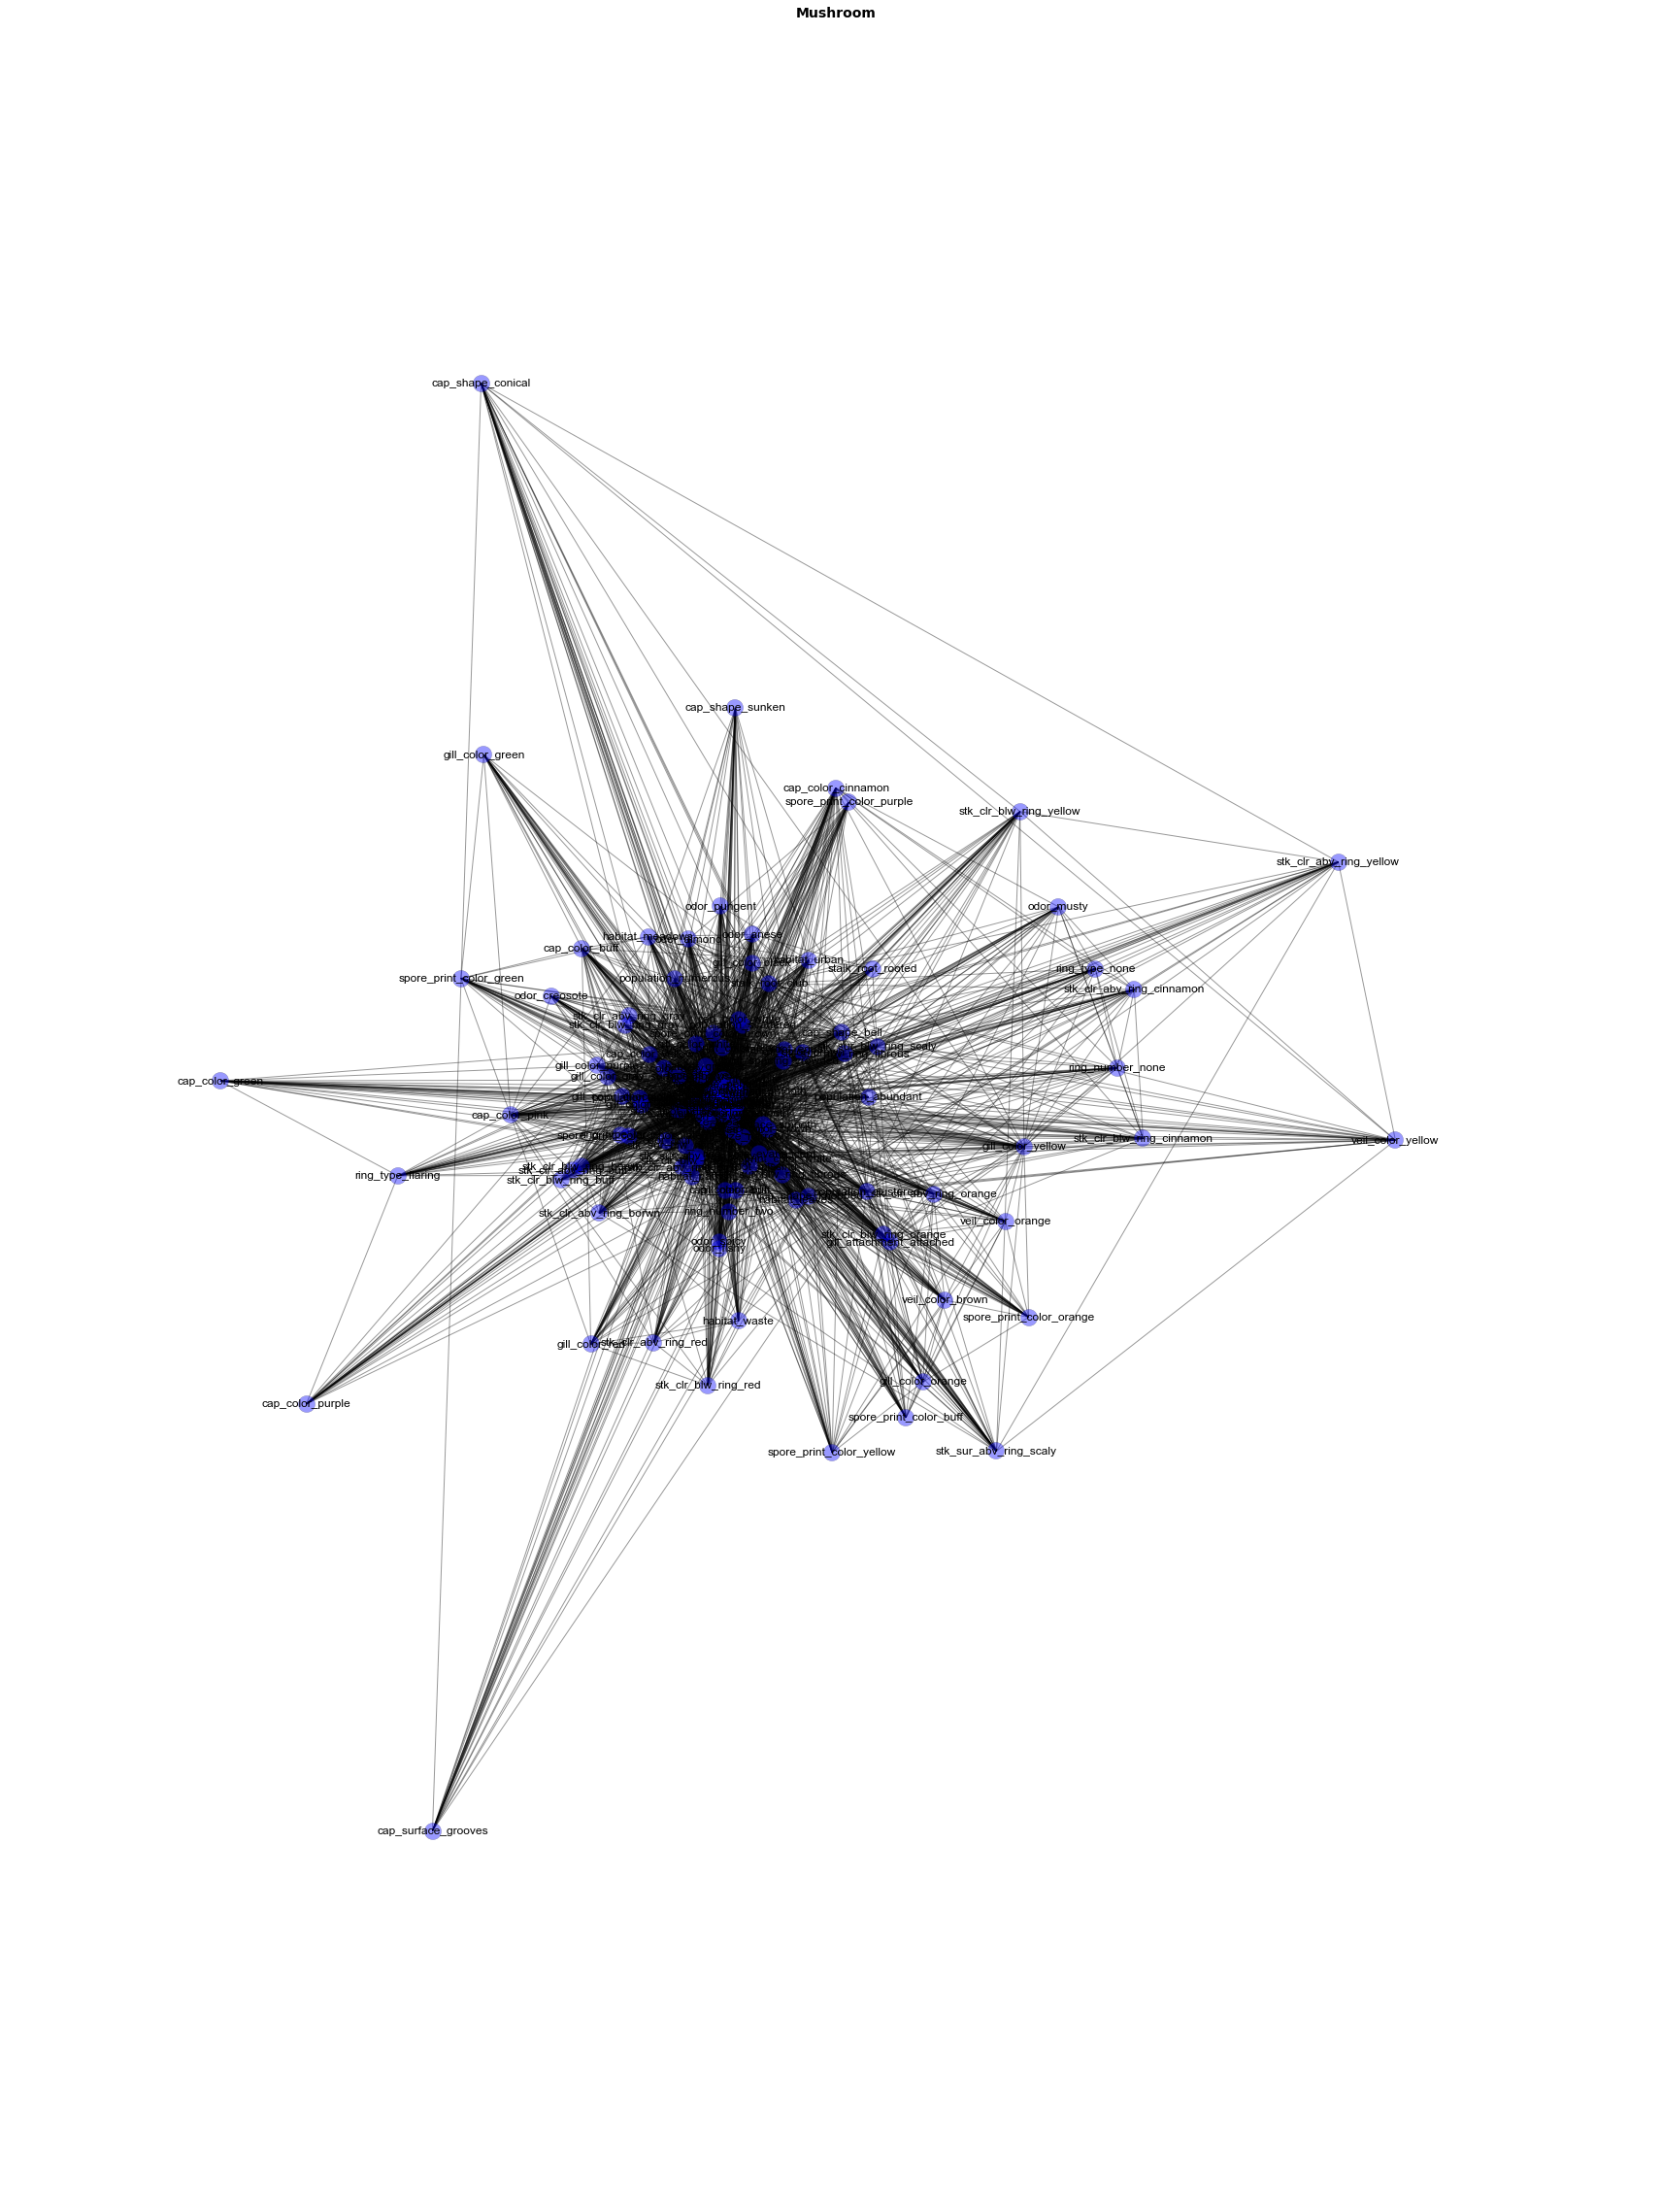

In [271]:
plt.figure(figsize=(30,40))
pos=nx.spring_layout(G, iterations=50, scale=2, k=.15)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 14}
plt.title("Mushroom", font)


nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

In [272]:

centrality=nx.eigenvector_centrality(G)

In [273]:
attribute_list = []
for node in centrality:
    attribute_list.append((node,centrality[node]))
    
sorted_attribute_list = attribute_list.sort(key=lambda x: x[1])

In [274]:

sorted(attribute_list, key=lambda x: x[1],reverse=True)

[('veil_type_partial', 0.304843394676603),
 ('veil_color_white', 0.29903086042651544),
 ('gill_attachment_free', 0.2987940803379999),
 ('ring_number_one', 0.28341065619895633),
 ('gill_spacing_close', 0.25812414620690866),
 ('gill_size_broad', 0.20966866662158454),
 ('stk_sur_abv_ring_smooth', 0.20018432238020584),
 ('stk_sur_blw_ring_smooth', 0.19128018311443906),
 ('stalk_shape_tapering', 0.18046966112807966),
 ('bruises?_no', 0.1711409670123799),
 ('stk_clr_abv_ring_white', 0.16932871996742022),
 ('stk_clr_blw_ring_white', 0.1665150688458599),
 ('population_several', 0.1550310519329295),
 ('ring_type_pendant', 0.15425395726671215),
 ('stalk_root_bulbous', 0.14626781416751952),
 ('cap_shape_convex', 0.1390251016121541),
 ('odor_none', 0.13484718500321397),
 ('bruises?_yes', 0.13370242766422313),
 ('habitat_woods', 0.12498005813046051),
 ('stalk_shape_enlarging', 0.12437373354852341),
 ('cap_surface_scaly', 0.12336724257344453),
 ('cap_shape_flat', 0.11931456127736395),
 ('ring_type_e

### Veil_type_partial is the most connected attribute and the least connected is cap_shape_conical.